In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv("C:/Users/Dell/Desktop/EXCELR/Assignment - Data Science/SLR/delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
df1 = df.rename({"Delivery Time":"delivery_t", "Sorting Time":"sorting_t"}, axis=1)


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   delivery_t  21 non-null     float64
 1   sorting_t   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [12]:
df1.corr()

,delivery_t,sorting_t
delivery_t,1.000000,0.825997
sorting_t,0.825997,1.000000


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_t', ylabel='Density'>

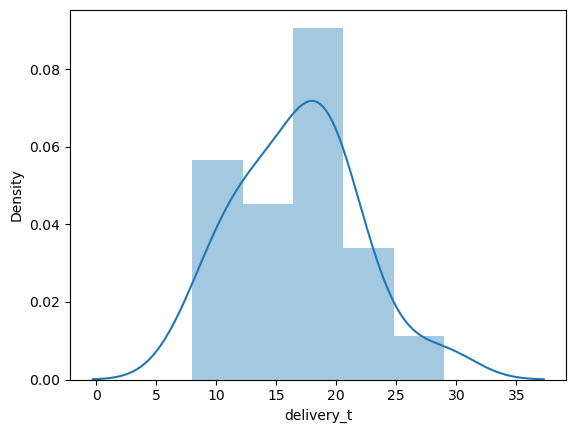

In [13]:
sns.distplot(df1['delivery_t'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_t', ylabel='Density'>

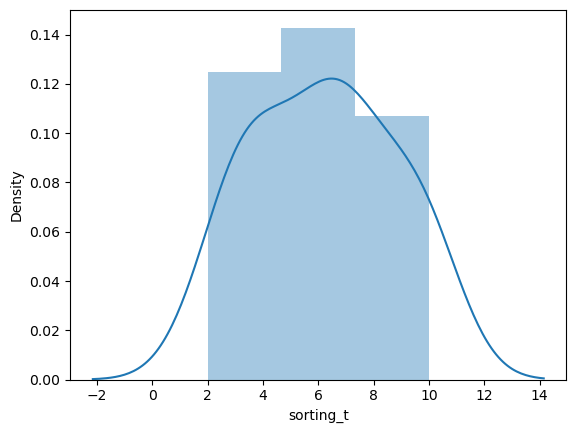

In [14]:
sns.distplot(df1['sorting_t'])

In [15]:
import statsmodels.formula.api as smf 
model = smf.ols("delivery_t~sorting_t", data = df1).fit()

<AxesSubplot:xlabel='sorting_t', ylabel='delivery_t'>

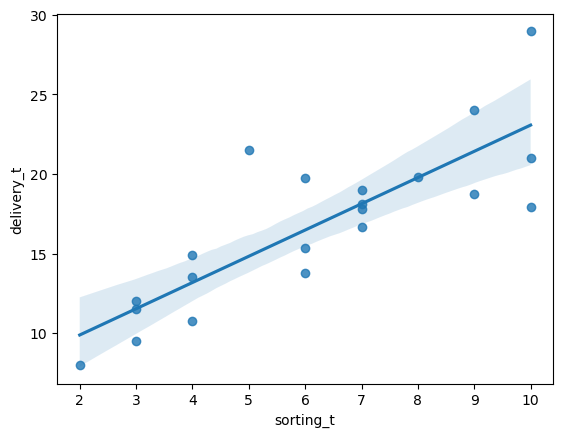

In [16]:
sns.regplot(x="sorting_t", y="delivery_t", data=df1)

In [17]:
#coefficient
model.params

Intercept    6.582734
sorting_t    1.649020
dtype: float64

In [18]:
#R square values
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [19]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept    3.823349
sorting_t    6.387447
dtype: float64 
 Intercept    0.001147
sorting_t    0.000004
dtype: float64


In [20]:
#Predicting for sorting timr 5 and 7
N_data = pd.Series([5,7])
N_data

0    5
1    7
dtype: int64

In [21]:
df_pred = pd.DataFrame(N_data, columns=["sorting_t"])
df_pred

,sorting_t
0,5
1,7


In [22]:
model.predict(df_pred)

0    14.827833
1    18.125873
dtype: float64

In [23]:
model.predict(df1)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64